In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [2]:
with open('plato_republic_clean/unlikely_words.csv') as f:
    reader = csv.reader(f)
    print(' -- '.join(next(reader)))

diff: 0.025 -- ignore: <eos> -- text: test


In [3]:
df = pd.read_csv('plato_republic_clean/unlikely_words.csv', skiprows=1)
df.head()

,actual,generated,freq
0,was,",",7
1,conceived,EOS,1
2,a,the,26
3,method,",",1
4,of,the,68


In [4]:
df.freq.describe()

count    2013.000000
mean        1.710879
std         2.973352
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        68.000000
Name: freq, dtype: float64

In [5]:
df.generated.describe()

count     2013
unique       6
top        the
freq       488
Name: generated, dtype: object

In [6]:
df.generated.unique()

array([',', 'EOS', 'the', '.', 'of', 'and'], dtype=object)

***

In [83]:
df_gen = df.groupby('generated').sum()[['freq']].sort_values('freq', ascending=False)
df_gen[:20]

,freq
generated,
the,1112
",",753
of,641
and,375
EOS,309
.,254


In [82]:
df_act = df.groupby('actual').sum()[['freq']].sort_values('freq', ascending=False)
df_act[:20]

,freq
actual,
of,68
a,67
to,67
is,67
in,51
.,48
and,41
be,41
EOS,40


***

In [10]:
import textData

In [12]:
corpus = textData.Corpus('plato_republic_clean/')
corp_eval = corpus.test

In [13]:
def get_index(x):
    return corpus.dictionary.word2idx[x]

In [14]:
df['actual_idx'] = df['actual'].apply(lambda x: get_index(x))
df['generated_idx'] = df['generated'].apply(lambda x: get_index(x))

In [15]:
df.head()

,actual,generated,freq,actual_idx,generated_idx
0,was,",",7,111,12
1,conceived,EOS,1,766,20
2,a,the,26,67,4
3,method,",",1,851,12
4,of,the,68,21,4


***

In [16]:
vocab = len(corpus.dictionary.idx2word)
vocab

7020

In [17]:
m = np.zeros((vocab, vocab))

In [18]:
for index, row in df.iterrows():
    m[row.generated_idx][row.actual_idx] = row.freq

In [19]:
m.sum() == df.freq.sum()

True

In [20]:
np.set_printoptions(threshold=np.nan)

Get generated words with nonzero entries

In [54]:
m.sum(axis=1).nonzero()

(array([ 4, 12, 17, 19, 20, 21]),)

In [58]:
m_nonzero = m[m.sum(axis=1).nonzero()]

Get actual words with nonzero entries

In [59]:
m_nonzero = m_nonzero.T[m_nonzero.sum(axis=0).nonzero()].T

In [60]:
m_nonzero

array([[ 6.,  1.,  8.,  0.,  2., 41.,  0., 24., 40., 68., 21.,  5.,  2.,
         0.,  1.,  7.,  6.,  3.,  4.,  2.,  1.,  0.,  0., 18.,  3.,  1.,
         0.,  6.,  4.,  0.,  0., 12.,  9.,  0., 12.,  0.,  0., 10.,  5.,
         0.,  4.,  3., 22.,  7., 26.,  0.,  2.,  3.,  1., 32.,  0.,  1.,
         0.,  5., 14.,  0.,  0.,  6.,  0.,  1.,  0.,  4.,  0.,  0.,  1.,
         9.,  1.,  1.,  1.,  1.,  2.,  0.,  1.,  2.,  0.,  2.,  3.,  0.,
         1.,  3.,  4.,  3.,  0.,  1.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,
         0.,  1.,  5.,  1.,  2.,  1.,  4.,  0.,  0.,  0.,  2.,  1.,  5.,
         1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  0., 14.,  1.,
         1.,  7.,  0.,  1.,  0.,  4., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  3.,  3.,  0.,  0.,  3.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  2.,  4.,  1.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  5.,  4.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.

***

In [68]:
m_nonzero.shape

(6, 1301)

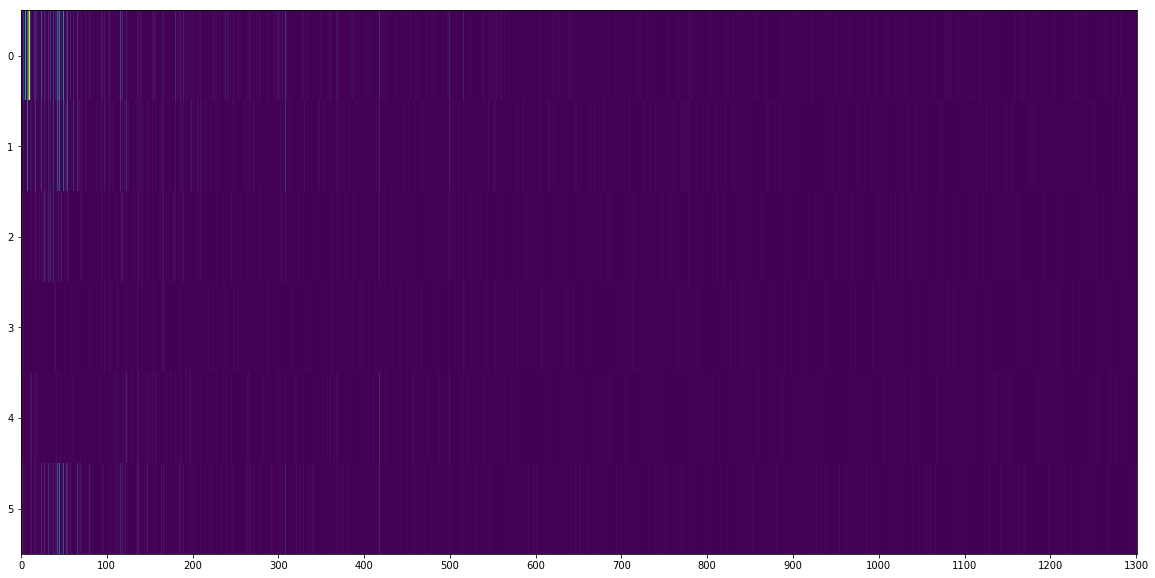

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(m_nonzero, aspect='auto')

ax.set_xticks(np.arange(m_nonzero.shape[1], step=100))